# COGS 118B - Models
Download the dataset from Kaggle: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


## Data Cleaning

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [2]:
path_to_data = "heart_2022_no_nans.csv"
heart_2022 = pd.read_csv(path_to_data)
heart_2022.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
heart_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [4]:
columns = list(heart_2022.columns)
print(f"Columns: {columns}")
print(f"Column Length: {len(columns)}")
print("------------------------------------------------")
print(heart_2022.dtypes)
print("------------------------------------------------")
print(heart_2022.isna().sum())

Columns: ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Column Length: 40
------------------------------------------------
State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               

In [5]:
for column in columns:
    print(column)
    if (heart_2022[column].dtypes != "object"):
        # print("Min: ", min(heart_2020_cleaned[column].unique()), "| Max: ", max(heart_2020_cleaned[column].unique()))
        print(heart_2022[column].describe())
    else:
        print(heart_2022[column].unique())
    print("------------------------------------------------")

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
------------------------------------------------
Sex
['Female' 'Male']
------------------------------------------------
GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
------------------------------------------------
PhysicalHealthDays
count    246022.000000
mean          4.119026
std           8.405844
min           0.000000
25%      

With this, the data is cleaned. Since the original dataset provided had no null values in the first place, we did not have to modify the dataset at all. With some analysis of the data, we have identified the different unique values for columns with data containing words, strings, and categories, and identified the distributions of the data contanining numerical values. The data includes no null values and we have upwards of 200k different values and 40 different columns to work with. Next, we will use one-hot encoding of the data to set up the data to do classification and analysis to predict what factors affect heart disease in patients.  

In [6]:
# scale float-based columns to between 0 and 1
numerical_cols = heart_2022.select_dtypes(include=['float']).columns
print(f'Numerical Columns: {list(numerical_cols)}')
for col in numerical_cols:
    heart_2022[col] = heart_2022[col]/heart_2022[col].max()

# one-hot encode categorical columns
category_cols = heart_2022.select_dtypes(include=['O']).columns
print(f'Categorical Columns {list(category_cols)}')
# for binary columns
binary_cols = [col for col in category_cols if heart_2022[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    heart_2022[col] = le.fit_transform(heart_2022[col])

# for columns with more than two unique values
multiple_cols = [col for col in category_cols if heart_2022[col].nunique() != 2]
df = pd.get_dummies(heart_2022, columns=multiple_cols, prefix=multiple_cols)
df.to_csv("heart_2022_cleaned.csv")
df.head()

Numerical Columns: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
Categorical Columns ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.133333,0.0,1,0.375000,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.000000,0.0,1,0.250000,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,0.000000,0.0,0,0.333333,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0.166667,0.0,1,0.375000,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
4,0,0.100000,0.5,1,0.208333,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [7]:
df_noindic = df.drop(columns=["HadHeartAttack", "HadAngina", "HadStroke"])
df_noindic.head()

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.133333,0.0,1,0.375000,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.000000,0.0,1,0.250000,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,0.000000,0.0,0,0.333333,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0.166667,0.0,1,0.375000,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0.100000,0.5,1,0.208333,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


## Hierarchical Clustering

In [8]:
from scipy import stats
from numpy.linalg import norm
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

In [9]:
heart_2022 = heart_2022.select_dtypes(include=[np.float64])
heart_2022

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.133333,0.000000,0.375000,0.663900,0.244967,0.286636
1,0.000000,0.000000,0.250000,0.738589,0.325563,0.308551
2,0.000000,0.000000,0.333333,0.767635,0.372082,0.324219
3,0.166667,0.000000,0.375000,0.705394,0.310080,0.320737
4,0.100000,0.500000,0.208333,0.643154,0.271320,0.338658
...,...,...,...,...,...,...
246017,0.000000,0.000000,0.250000,0.738589,0.348840,0.330568
246018,0.000000,0.233333,0.291667,0.800830,0.310080,0.249258
246019,0.000000,0.500000,0.291667,0.697095,0.286803,0.305786
246020,0.066667,0.066667,0.291667,0.705394,0.283727,0.293497


In [10]:
sampled_heart_2022 = heart_2022.sample(n=1000)
sampled_heart_2022

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
237823,0.000000,0.000000,0.291667,0.717842,0.294562,0.295853
162820,0.166667,0.000000,0.291667,0.697095,0.325563,0.347056
119729,0.000000,0.066667,0.250000,0.726141,0.356598,0.347773
220340,1.000000,0.166667,0.333333,0.746888,0.356598,0.328520
27498,0.166667,0.066667,0.208333,0.651452,0.182931,0.220993
...,...,...,...,...,...,...
147043,0.466667,0.233333,0.333333,0.717842,0.310080,0.311418
66424,1.000000,0.500000,0.166667,0.663900,0.449602,0.526062
209317,0.000000,0.000000,0.250000,0.676349,0.227911,0.258372
83781,0.000000,0.000000,0.333333,0.697095,0.248043,0.264414


In [11]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(sampled_heart_2022) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5
0,-0.640664,-0.662406,0.002726,0.337158,0.185704,0.050980
1,0.059042,-0.452804,0.001863,-0.176579,0.504030,0.711515
2,-0.302963,-0.173341,-0.428337,0.272075,0.609834,0.498771
3,0.872681,0.018107,0.213680,0.274550,0.302402,0.160049
4,0.025942,-0.110095,-0.544925,-0.471057,-0.540836,-0.419362
...,...,...,...,...,...,...
995,0.760324,0.203328,0.496644,0.183758,0.251706,0.191797
996,0.506032,0.211637,-0.370230,-0.164674,0.400375,0.612089
997,-0.326386,-0.337462,-0.461453,-0.434963,-0.509598,-0.343176
998,-0.407760,-0.421598,0.579972,-0.164410,-0.408649,-0.354393


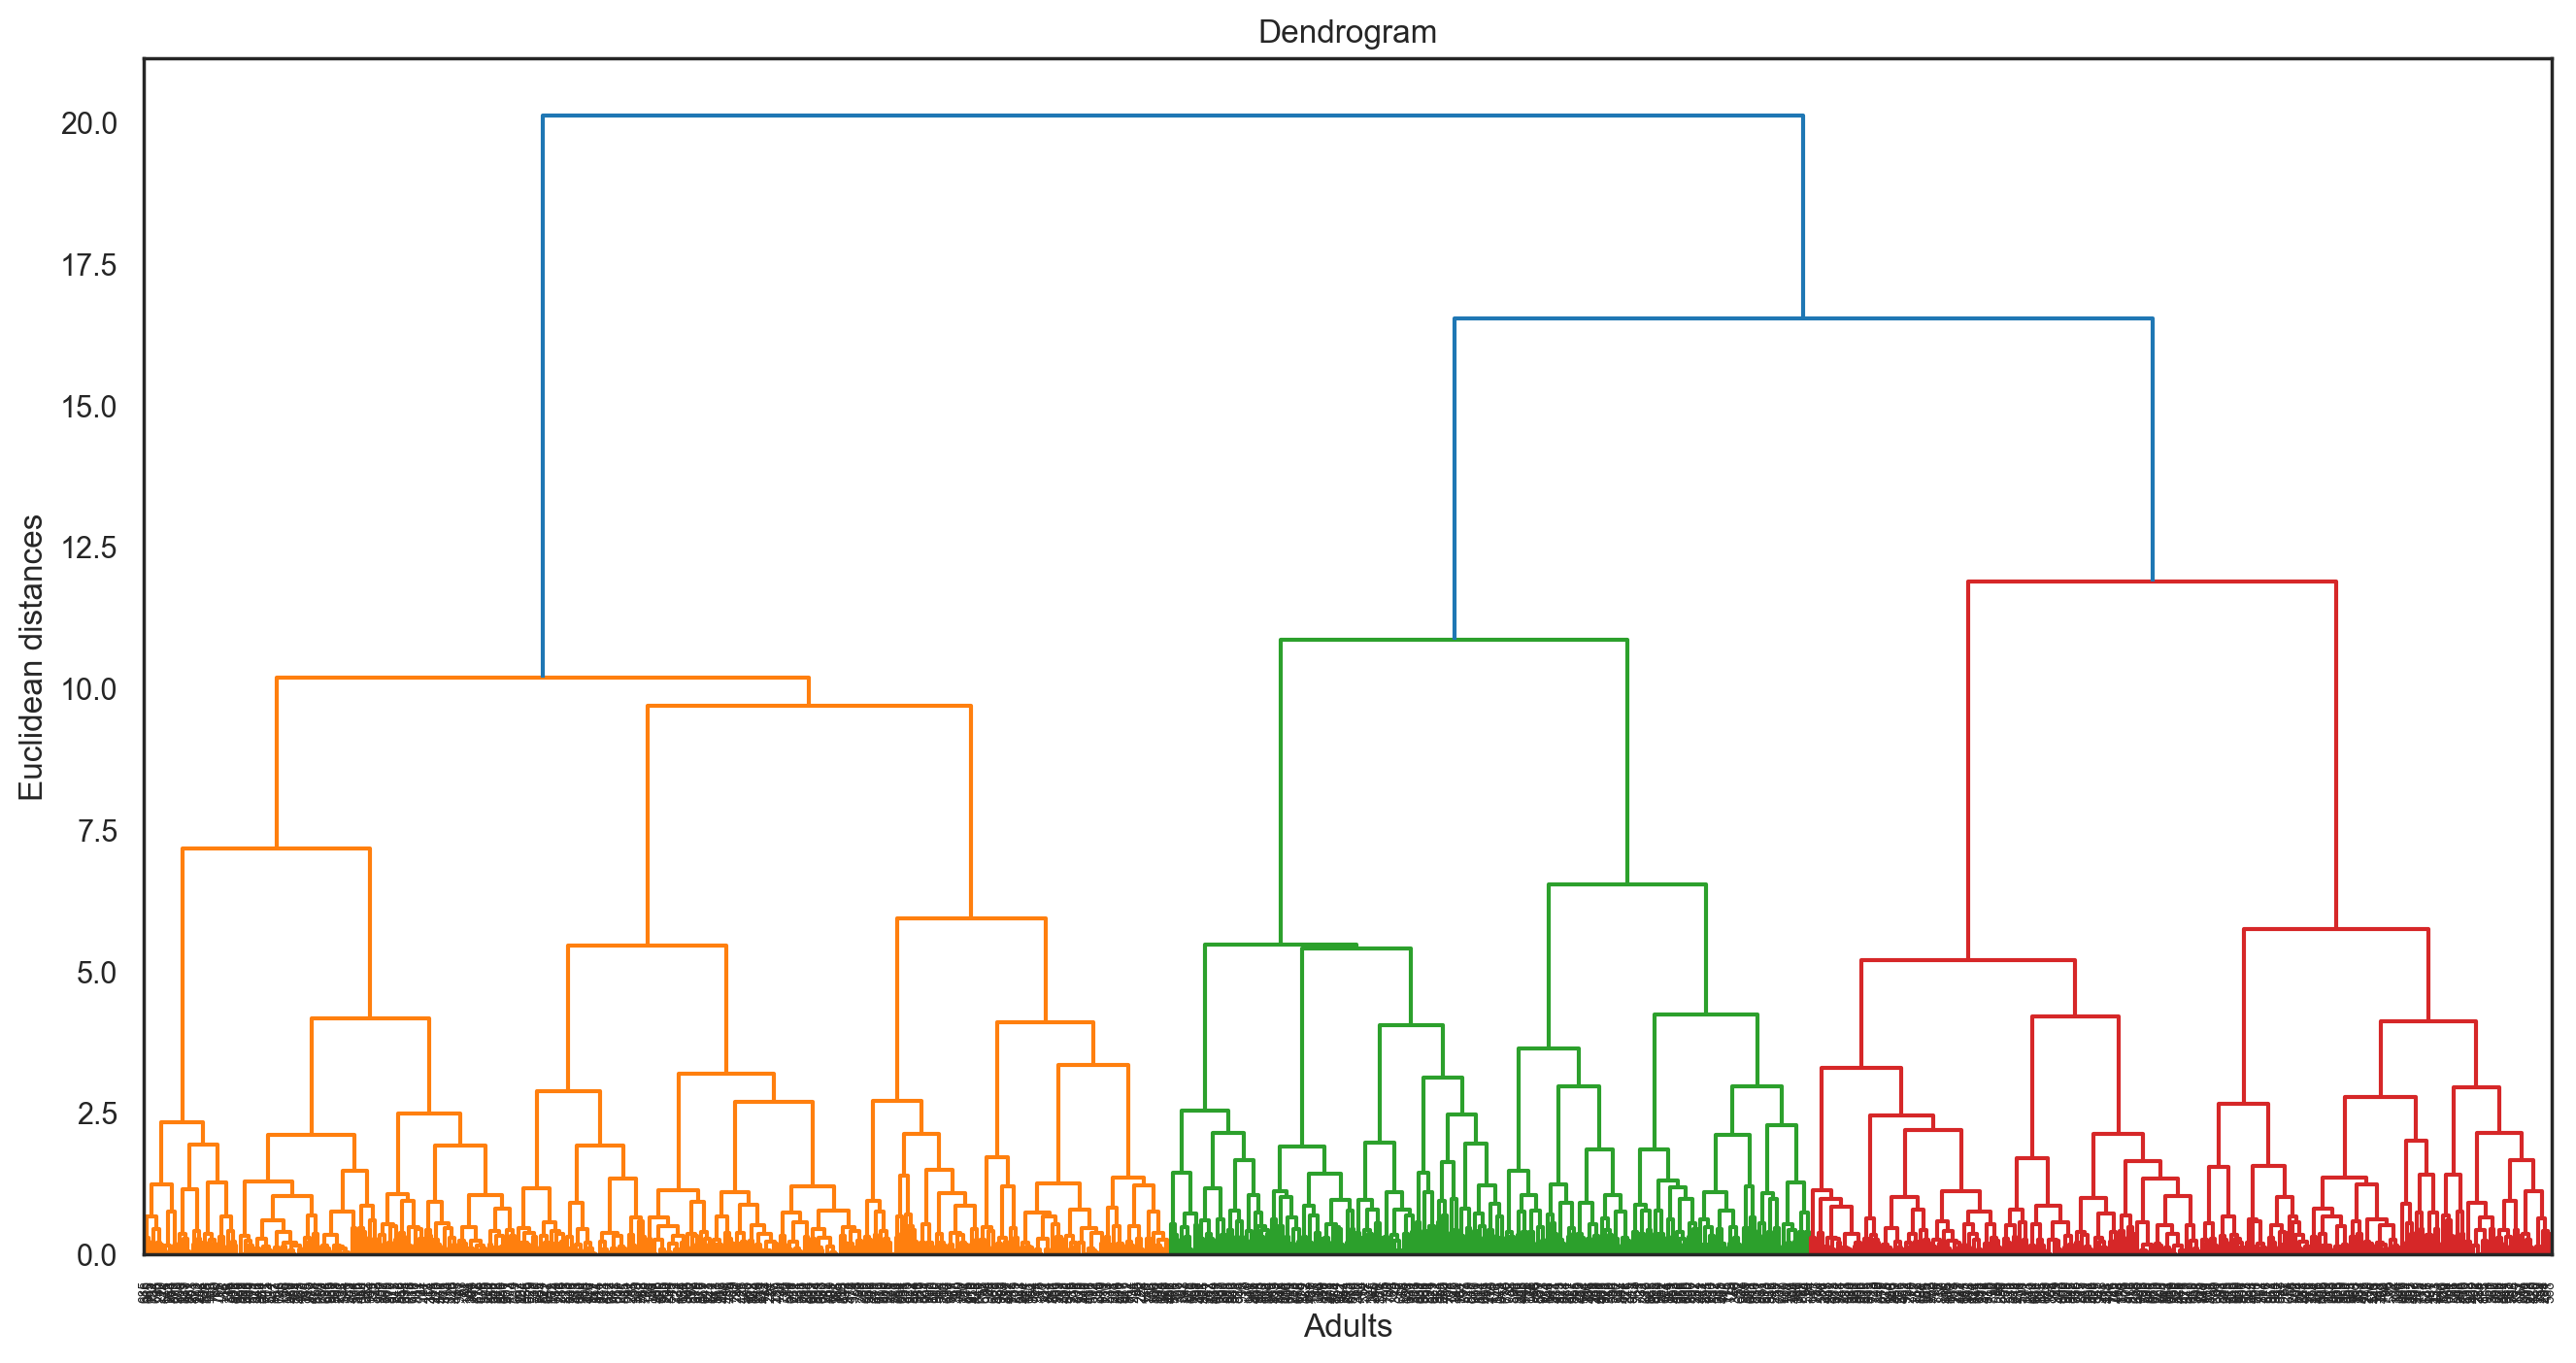

In [12]:
plt.figure(1, figsize = (16 ,8))
links = linkage(normalized_df, method = "ward")
dendrogram = dendrogram(links)

plt.title('Dendrogram')
plt.xlabel('Adults')
plt.ylabel('Euclidean distances')
plt.show()

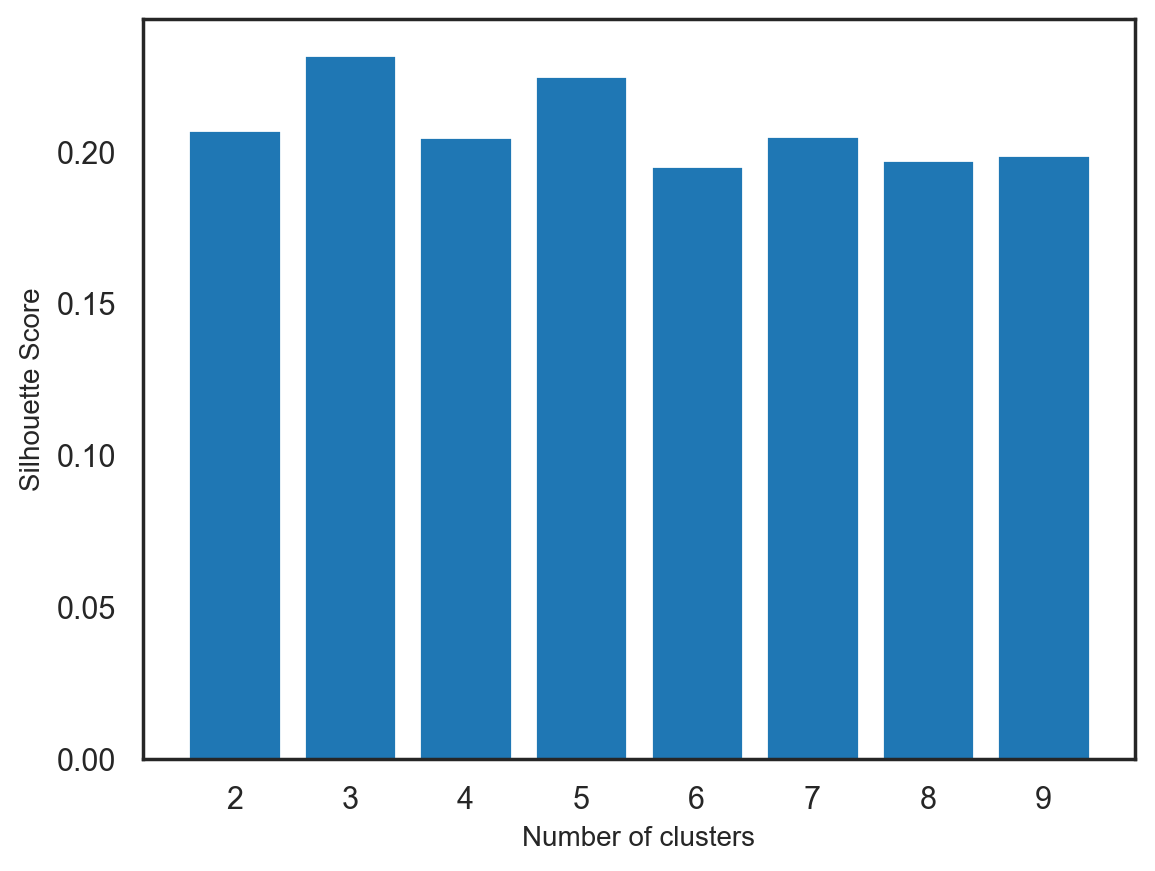

In [13]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [14]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='average')

hc = hc.fit(normalized_df)
hc.labels_

c:\Users\yasho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 3, 1, 0, 3, 3, 1, 1, 1, 3, 5, 2, 1, 5, 3, 1, 1, 5, 0, 2,
       1, 1, 3, 5, 1, 3, 1, 1, 5, 1, 0, 1, 1, 1, 3, 2, 0, 3, 1, 2, 2, 2,
       1, 4, 1, 4, 1, 1, 5, 0, 0, 3, 0, 4, 0, 2, 1, 0, 1, 2, 4, 1, 3, 1,
       3, 1, 4, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 5, 4, 1, 1, 0, 2, 2, 2, 1,
       2, 4, 3, 3, 3, 2, 4, 0, 1, 1, 2, 1, 1, 2, 3, 1, 1, 5, 3, 3, 1, 5,
       1, 2, 5, 3, 2, 0, 3, 1, 5, 4, 5, 1, 1, 2, 0, 2, 2, 5, 4, 5, 1, 2,
       2, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, 2, 5, 2, 2, 2, 0, 3, 1, 3, 5, 2,
       0, 2, 3, 1, 1, 2, 1, 0, 5, 5, 0, 5, 1, 1, 2, 1, 2, 3, 1, 1, 2, 2,
       3, 5, 2, 3, 2, 3, 2, 3, 1, 1, 0, 3, 1, 2, 1, 2, 2, 0, 1, 4, 3, 3,
       3, 1, 1, 1, 1, 1, 5, 1, 2, 1, 2, 4, 5, 1, 1, 1, 2, 5, 2, 2, 0, 2,
       2, 1, 1, 5, 1, 2, 2, 2, 4, 2, 2, 0, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 0, 3, 0, 1, 2, 1, 2, 4, 2, 1, 3, 0, 0, 1, 4, 2, 2, 2, 0, 1, 0,
       5, 4, 2, 4, 2, 4, 1, 5, 4, 3, 2, 2, 0, 4, 2, 5, 1, 1, 1, 0, 1, 5,
       3, 3, 1, 4, 3, 5, 0, 1, 2, 0, 2, 1, 4, 1, 2,

# Gaussian Mixture Model

We begin by running a gaussian mixture model on the cleaned data for a variety of n_component values between 2 and 10 while calculating the silhouette score for each iteration:

In [15]:
from sklearn.mixture import GaussianMixture

sample_df = df.sample(n = 500, random_state = 42)
gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(sample_df)
    labels = gmm.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)

To visualize our model performance, we plot the silhouette scores.

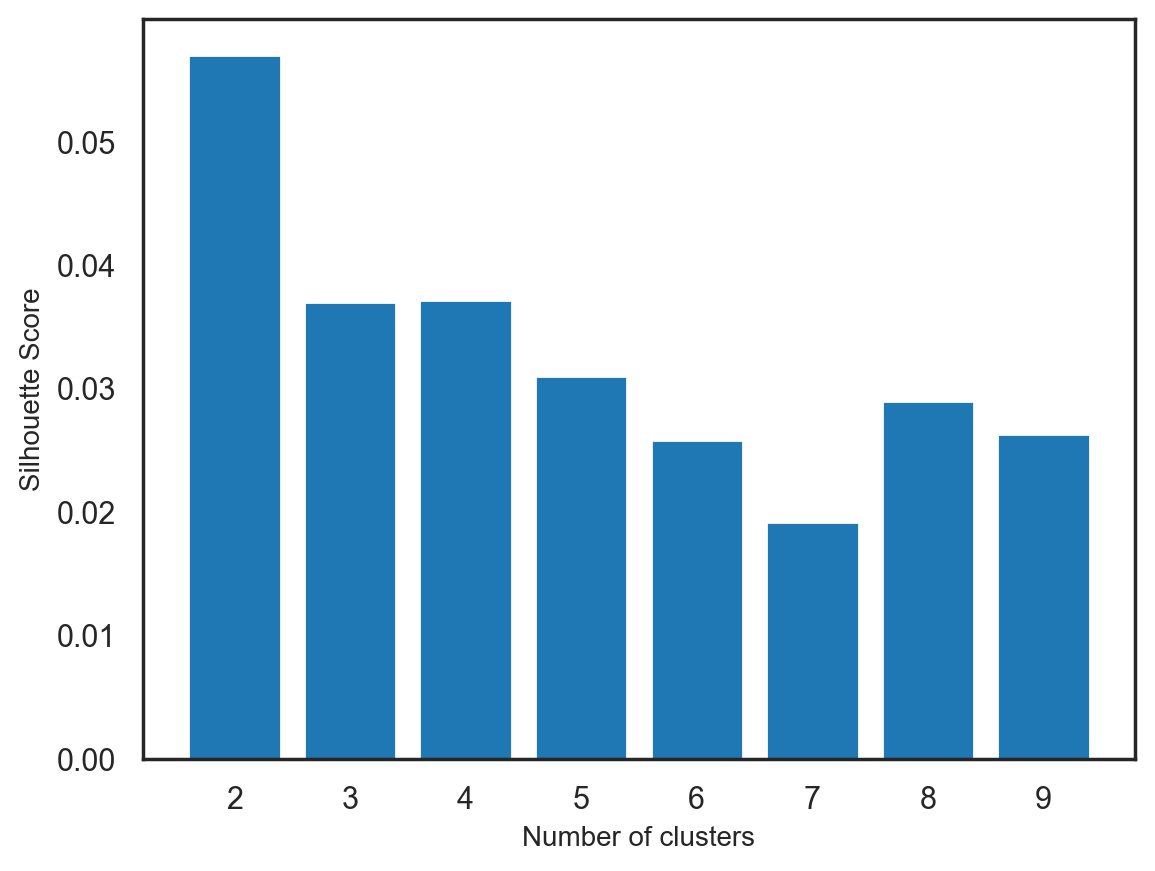

In [16]:
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

The score for two clusters is greatest, suggesting that this number of clusters may be the most optimal for our data. However, all the scores are extremely low, suggesting that the clustering produced by GMM's is quite poor. This may be due to the overwhelming amount of binary columns in the data set. To address this, we repeat the process on only the numerical values of the data:

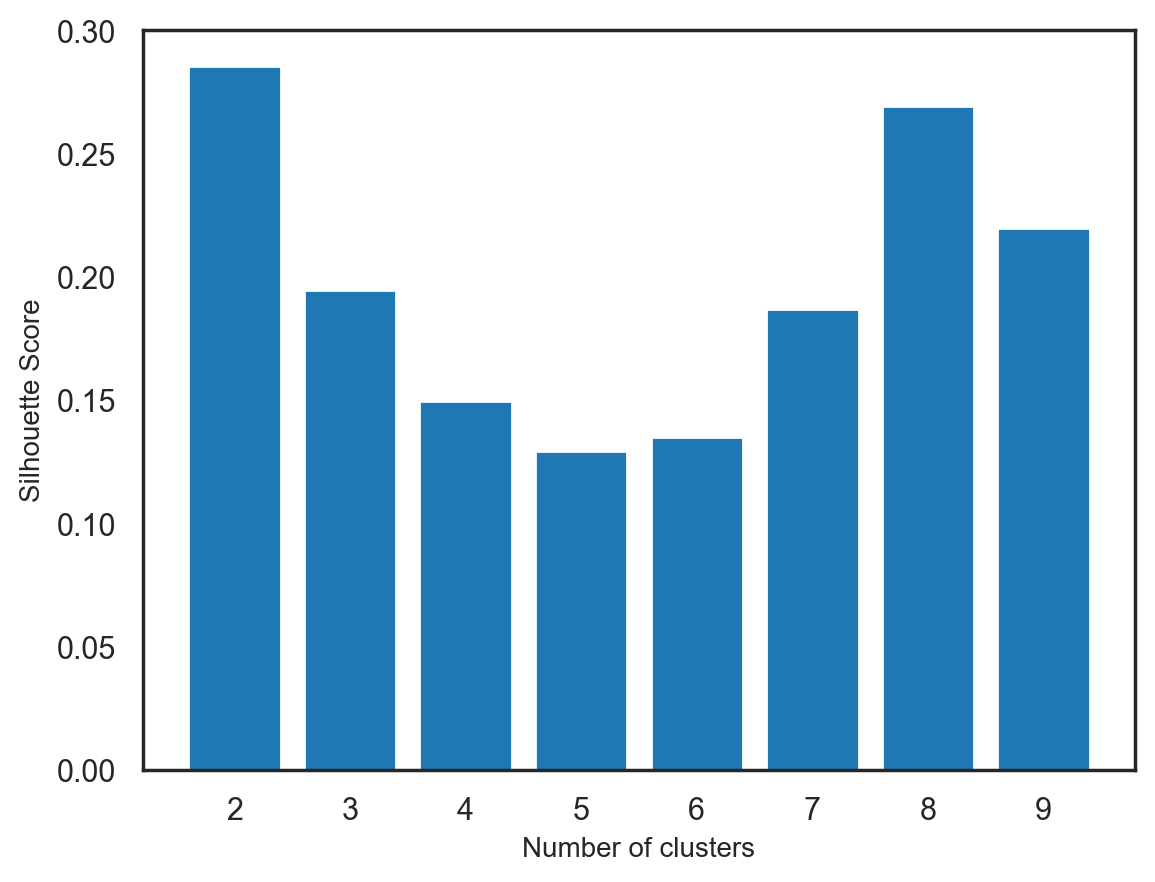

0.2858833266146634


In [17]:
sample_df = df.sample(n = 500, random_state = 42)
sample_df = sample_df.select_dtypes(include=[np.float64])
gmm_scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 42)
    gmm.fit(sample_df)
    labels = gmm.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    #print(f'Silhouette score for {k} clusters: {score}')
    gmm_scores.append(score)
    
plt.bar(range(2, 10), gmm_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

print(gmm_scores[0])

2 components continues to have the highest silhouette score. Addtionally, scores across the board have increased significantly. Despite this, with a max score of 0.2858833266159307, a Gaussian Mixture Model doesn't seem to be producing the best clustering for our data set.

# KMeans

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D

# KMeans clustering
sample_df = df.sample(n = 5000, random_state = 42)
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sample_df)
    labels = kmeans.predict(sample_df)
    score = silhouette_score(sample_df, labels)
    kmeans_scores.append(score)

Let's visualize the silhouette scores for K-means.

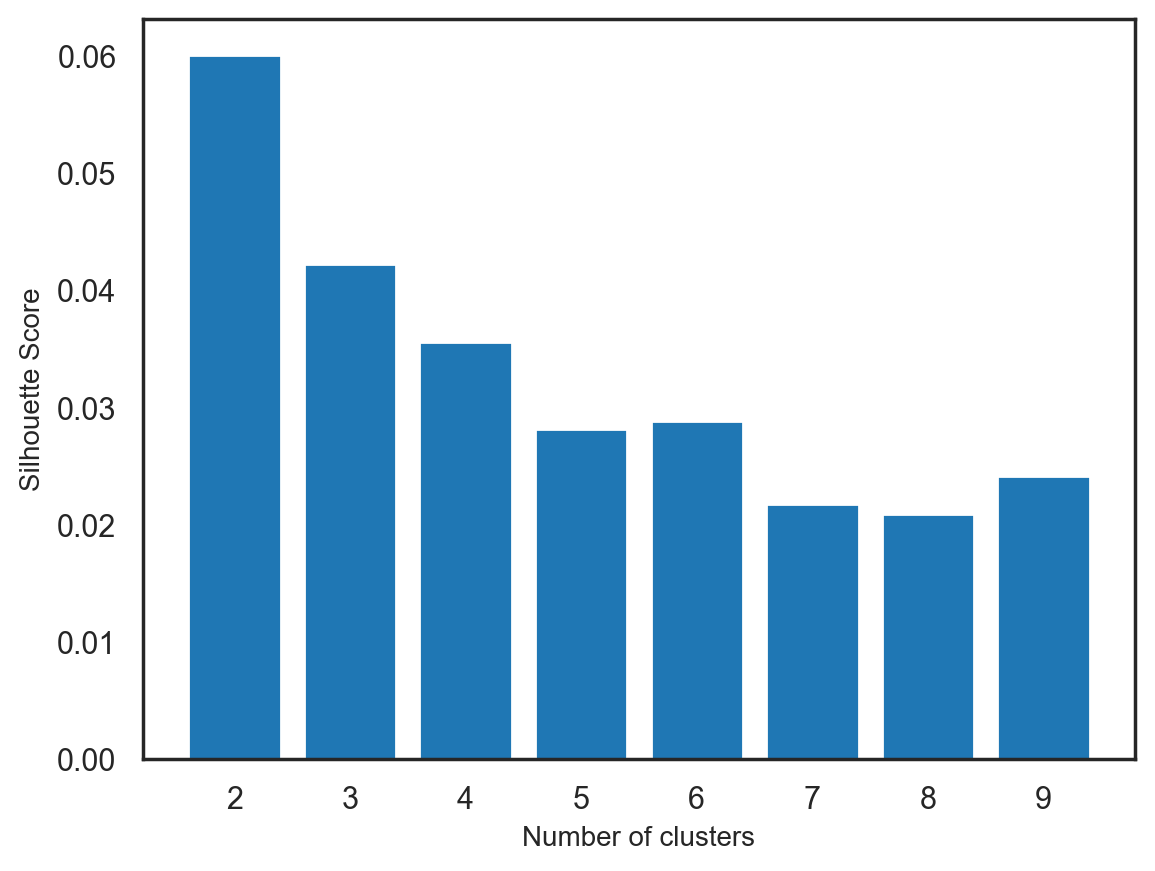

In [64]:
plt.bar(range(2, 10), kmeans_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

Similar to Guassian Mixture Model, the Silhouette scores for K-means is very low for all clusters, with the score for 2 clusters being the highest. Therefore, let's repeat the process while using OneHot Encoding for categorical data and Scaler for the numerical data.

In [71]:
sample_df = df.sample(n = 5000, random_state = 42)

numerical_df = sample_df.select_dtypes(include=[np.float64])
categorical_df = sample_df.select_dtypes(include=[object])

# Handle categorical variables (one-hot encoding)
encoder = OneHotEncoder()
encoded_categorical = pd.DataFrame(encoder.fit_transform(categorical_df).toarray())

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_df)

# Combine numerical and encoded categorical features
processed_df = pd.concat([pd.DataFrame(scaled_numerical), encoded_categorical], axis=1)

Let's PCA this data to reduce the number of features and find how much each PC affects the total variance of the data. 

Variance explained by Principal Component 1: 0.33
Variance explained by Principal Component 2: 0.23
Variance explained by Principal Component 3: 0.17
Total variance explained by Principal Component: 0.73


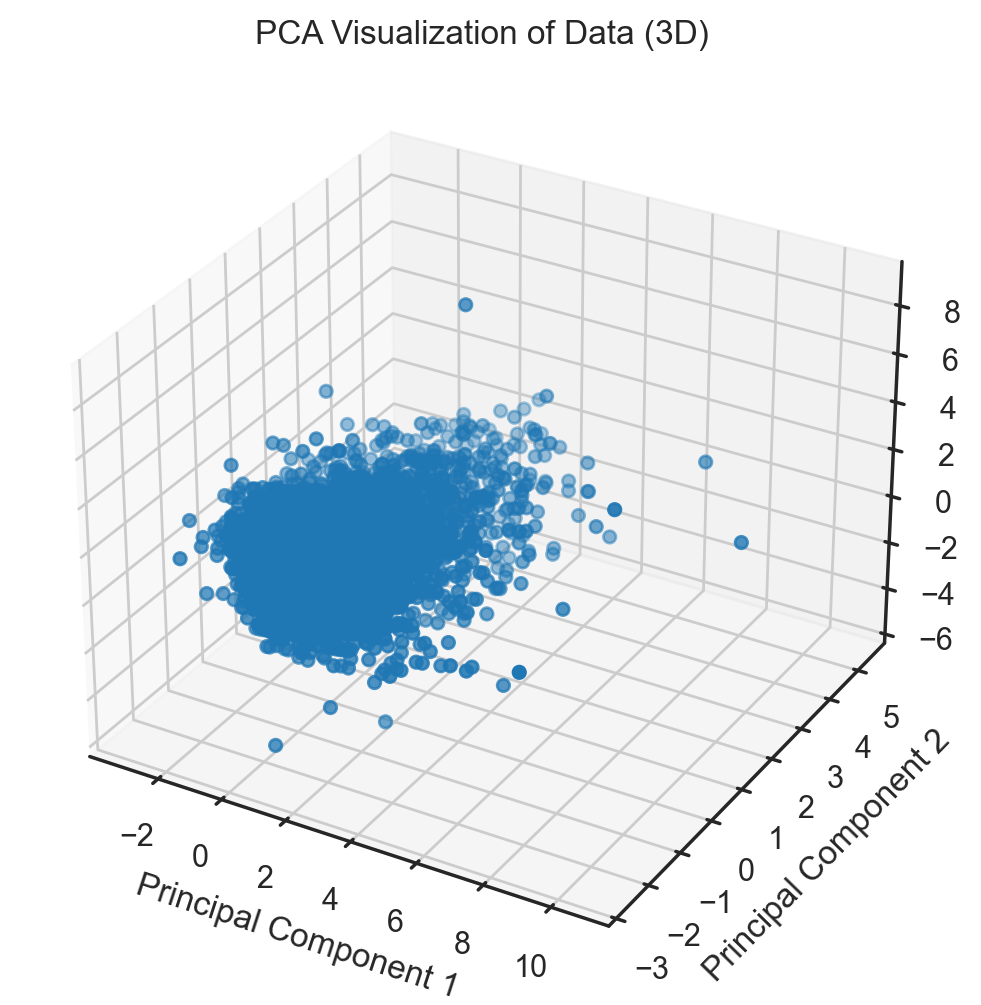

In [72]:
# Apply dimensionality reduction (PCA) with 3 components
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(processed_df)

variance_explained = pca.explained_variance_ratio_
total_variance_explained = 0

for i, var in enumerate(variance_explained):
    print(f"Variance explained by Principal Component {i+1}: {var:.2f}")
    total_variance_explained += var
print(f"Total variance explained by Principal Component: {total_variance_explained:.2f}")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2])
ax.set_title('PCA Visualization of Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Now, let's try K-means to cluster the data once again and see if there are any differences in the Silhouette scores. 

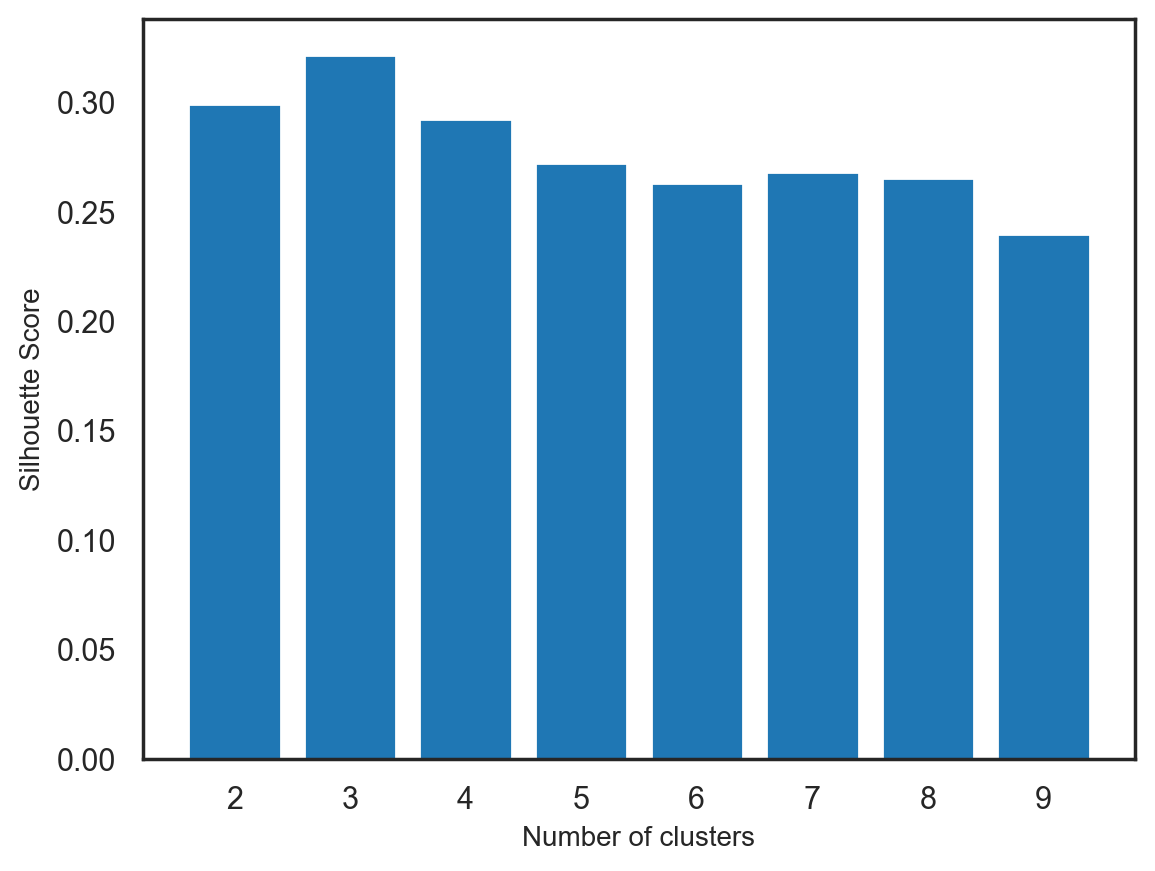

In [73]:
kmeans_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_features)

    score = silhouette_score(reduced_features, labels)
    kmeans_scores.append(score)
    
plt.bar(range(2, 10), kmeans_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

We can see that the Silhouette scores are significantly higher, with the highest scores being for 2, 3, and 4 clusters. 

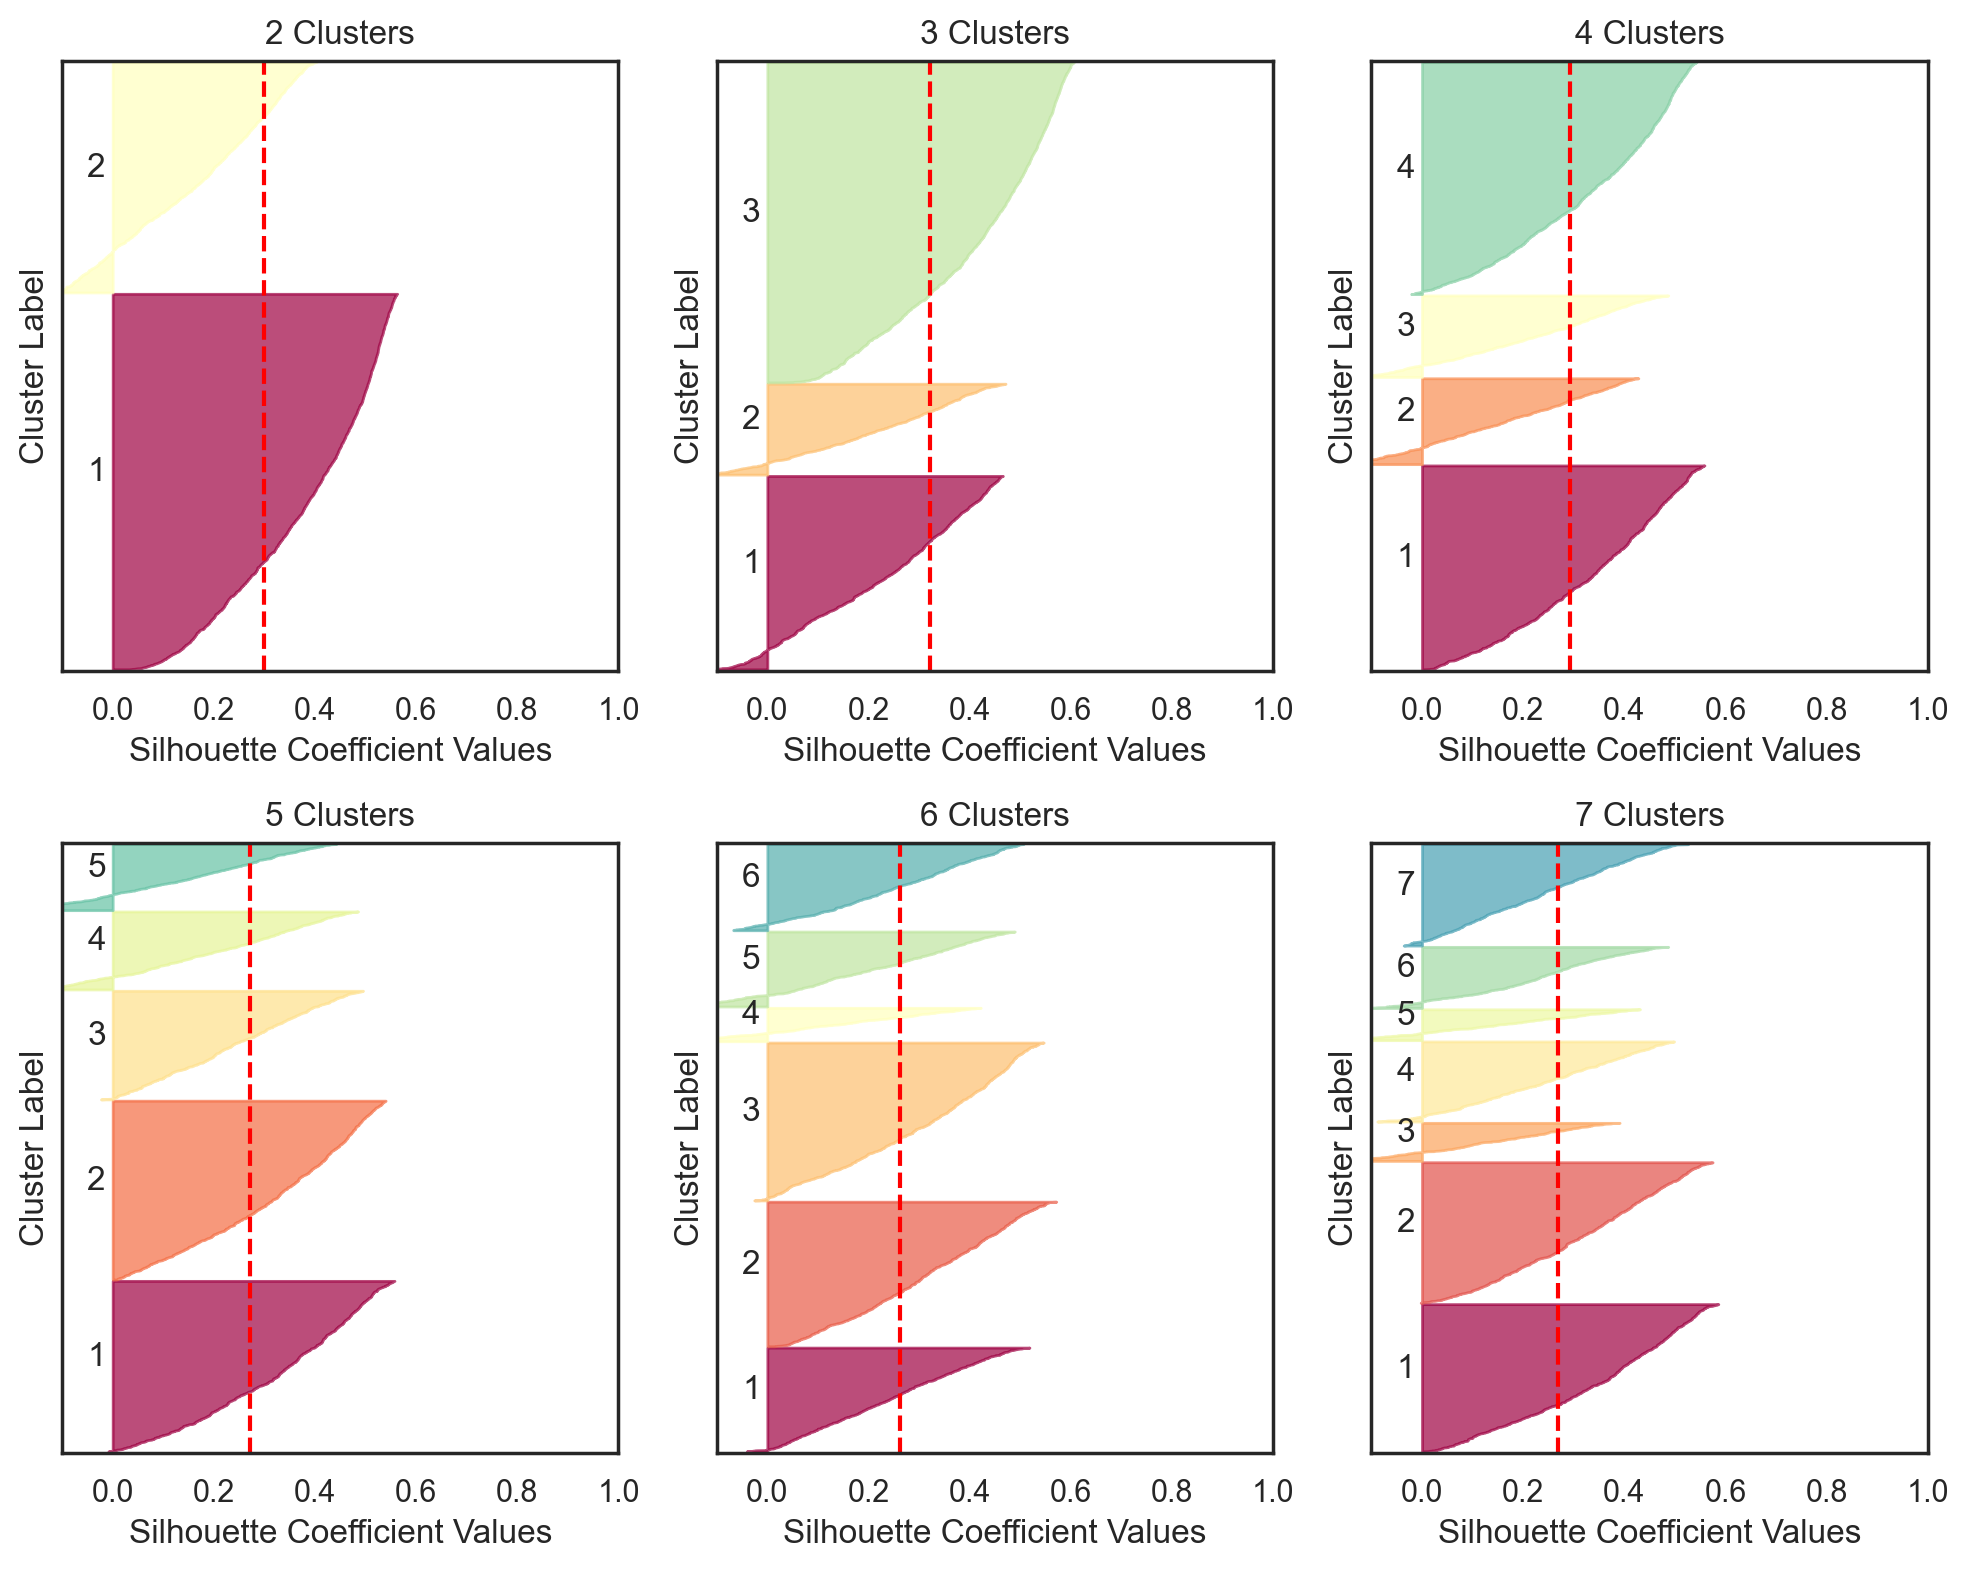

In [74]:
# Analyze silhouette scores for different number of clusters
cluster_configs = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

plt.figure(figsize=(10, 8))

for idx, k in enumerate(cluster_configs, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_features)
    
    silhouette_scores.append(silhouette_score(reduced_features, labels))
    silhouette_vals = silhouette_samples(reduced_features, labels)

    ax = plt.subplot(2, 3, idx)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(reduced_features) + (k + 1) * 10])
    
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_vals = silhouette_vals[labels == i]
        ith_cluster_silhouette_vals.sort()

        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10
    
    ax.set_title(f'{k} Clusters')
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')

    ax.axvline(x=silhouette_scores[idx-1], color="red", linestyle="--")
    ax.set_yticks([])

plt.tight_layout()
plt.show()

As you can see, the different Silhouette Samples above display clusters with differing densities, sizes, and generally a good amount of negative values, indicating objects that are poorly matched to their own clusters in comparison with neighboring clusters. The plot with 3 clusters had the highest Silhouette Coefficient, so let's use the Elbow Method to check whether this is the optimal number of clusters to use. 

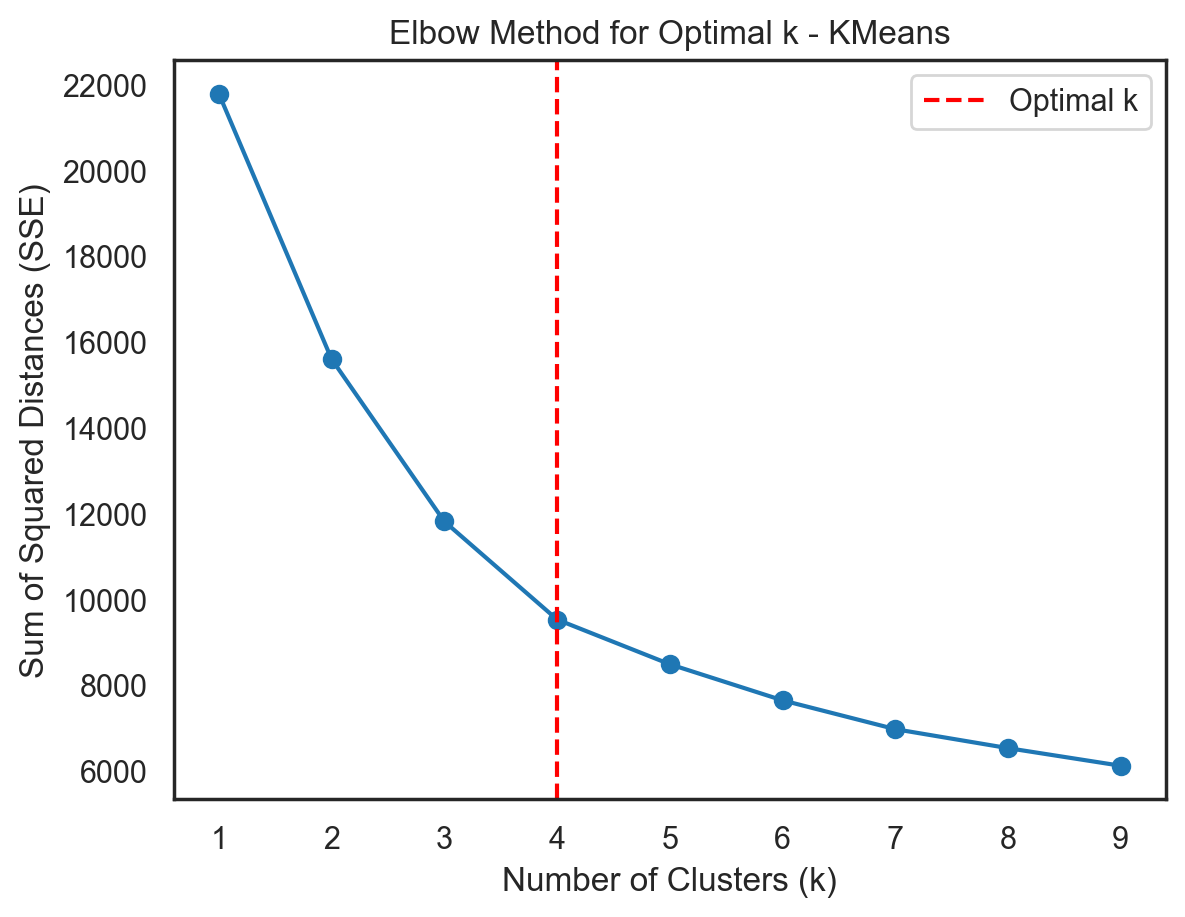

In [75]:
sse = []
max_k = 10

# Calculate SSE for different values of k
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(reduced_features)
    sse.append(kmeans.inertia_)

# Find the elbow point
knee = KneeLocator(range(1, max_k), sse, curve='convex', direction='decreasing')

# Plot SSE curve
plt.plot(range(1, max_k), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k - KMeans')
plt.xticks(range(1, max_k))
plt.axvline(knee.elbow, color='red', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

# PCA the dataset

Variance Explained by each Principal Component:
Principal Component 1: 0.33
Principal Component 2: 0.24

Cumulative Variance Explained:
Principal Components 1-1: 0.33
Principal Components 1-2: 0.57

Principal Components:
          0         1         2         3         4         5
0  0.093948  0.062518 -0.055607  0.421578  0.702933  0.558865
1  0.331226  0.403458 -0.350187 -0.681027  0.001962  0.375604


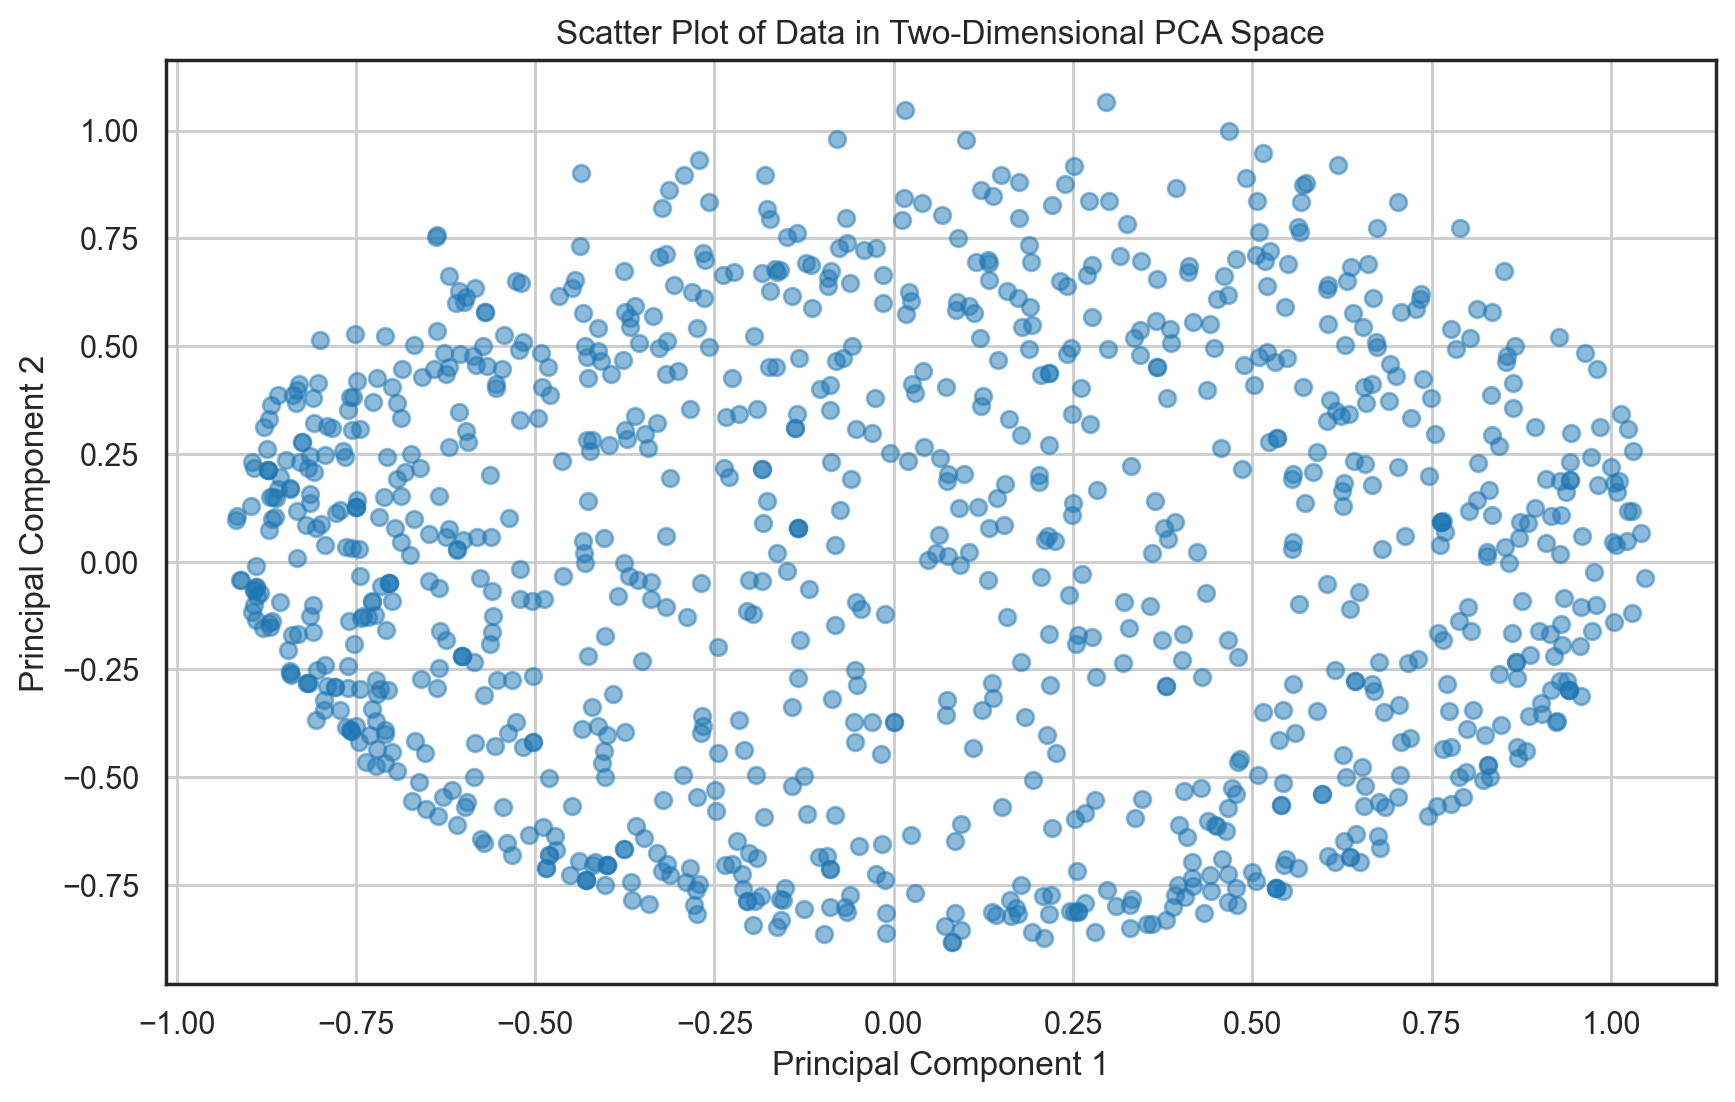

In [22]:
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(normalized_df)
projected_data = pca.transform(normalized_df)

projected_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2'])

# Variance by each Principal Component (first two components)
variance_explained = pca.explained_variance_ratio_
print("Variance Explained by each Principal Component:")
for i, var in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {var:.2f}")

# Cumulative variance 
cumulative_variance_explained = variance_explained.cumsum()
print("\nCumulative Variance Explained:")
for i, cum_var in enumerate(cumulative_variance_explained):
    print(f"Principal Components 1-{i+1}: {cum_var:.2f}")

# All Principal Components and Loadings
components_df = pd.DataFrame(pca.components_, columns=normalized_df.columns)
print("\nPrincipal Components:")
print(components_df)

# Plot the data points in the new two-dimensional space
plt.figure(figsize=(10, 6))
plt.scatter(projected_df['PC1'], projected_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data in Two-Dimensional PCA Space')
plt.grid(True)
plt.show()

# Feel Free to Delete: Was Checking What more PCs would look like:

Variance Explained by each Principal Component:
Principal Component 1: 0.33
Principal Component 2: 0.24
Principal Component 3: 0.19

Cumulative Variance Explained:
Principal Components 1-1: 0.33
Principal Components 1-2: 0.57
Principal Components 1-3: 0.76

Principal Components:
          0         1         2         3         4         5
0  0.093948  0.062518 -0.055607  0.421578  0.702933  0.558865
1  0.331226  0.403458 -0.350187 -0.681027  0.001962  0.375604
2  0.165289  0.358144 -0.705084  0.454654 -0.093804 -0.362987


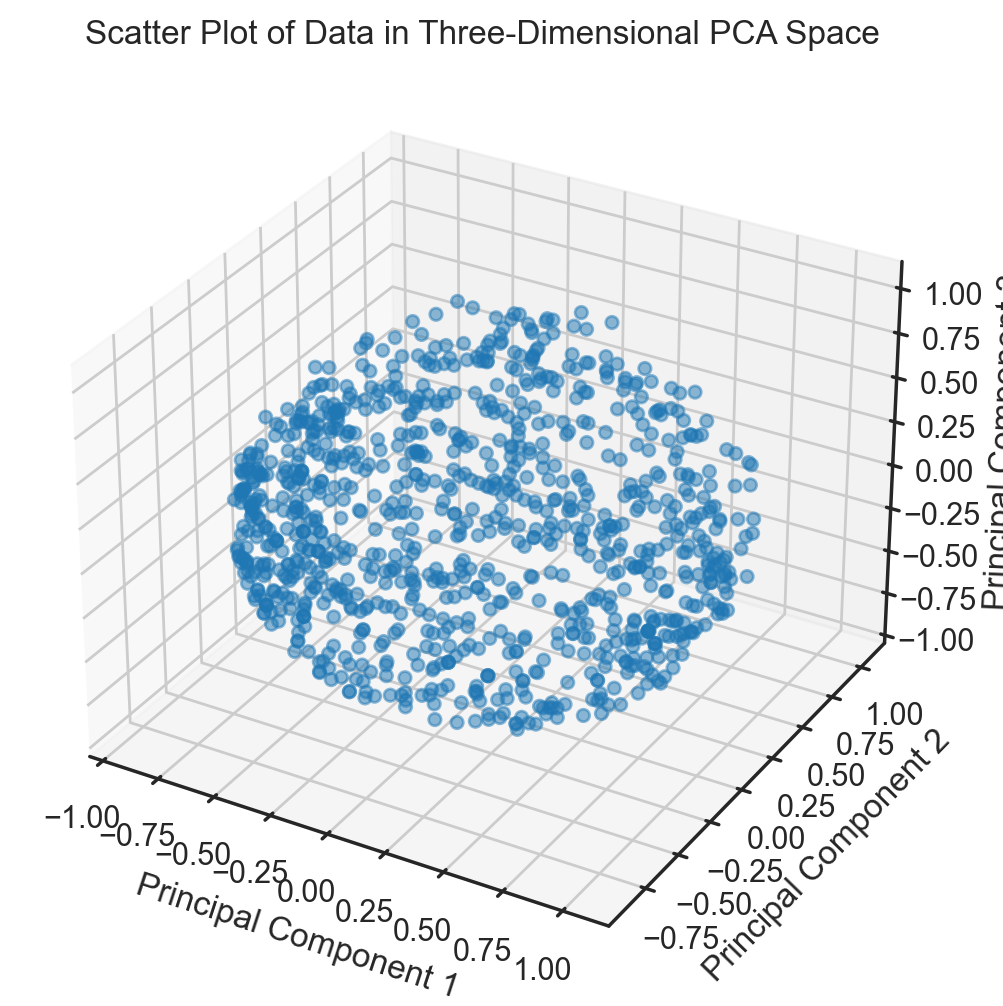

In [45]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)  # Change the number of components to 3
pca.fit(normalized_df)
projected_data = pca.transform(normalized_df)

projected_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2', 'PC3'])  # Update column names

# Variance by each Principal Component (first three components)
variance_explained = pca.explained_variance_ratio_
print("Variance Explained by each Principal Component:")
for i, var in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {var:.2f}")

# Cumulative variance 
cumulative_variance_explained = variance_explained.cumsum()
print("\nCumulative Variance Explained:")
for i, cum_var in enumerate(cumulative_variance_explained):
    print(f"Principal Components 1-{i+1}: {cum_var:.2f}")

# All Principal Components and Loadings
components_df = pd.DataFrame(pca.components_, columns=normalized_df.columns)
print("\nPrincipal Components:")
print(components_df)

# Plot the data points in the new three-dimensional space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_df['PC1'], projected_df['PC2'], projected_df['PC3'], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Scatter Plot of Data in Three-Dimensional PCA Space')
plt.show()
